In [1]:
%matplotlib qt5

In [2]:
import hyperspy.api as hs

In [9]:
s = hs.load("002_EELS-SI_1.7nm_2mmAp_MnFe_Stack_Average denoised.dm3")
s

<EELSSpectrum, title: 002_EELS-SI_1.7nm_2mmAp_MnFe_Stack_Average denoised, dimensions: (40, 236|1028)>

In [5]:
s.plot()

In [10]:
s = s.inav[1:-1, 1:-1]
s

<EELSSpectrum, title: 002_EELS-SI_1.7nm_2mmAp_MnFe_Stack_Average denoised, dimensions: (38, 234|1028)>

In [7]:
s.plot()

In [11]:
s.set_microscope_parameters(beam_energy=100, collection_angle=50, convergence_angle=30)

In [12]:
s.decomposition(normalize_poissonian_noise=True)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


In [14]:
s.plot_explained_variance_ratio()

<Axes: title={'center': '002_EELS-SI_1.7nm_2mmAp_MnFe_Stack_Average denoised\nPCA Scree Plot'}, xlabel='Principal component index', ylabel='Proportion of variance'>

In [13]:
s_denoised = s.get_decomposition_model(components=3)

In [14]:
s_denoised.plot()

In [15]:
s_denoised.remove_background()

C:\Users\gerit\mambaforge\envs\hyperspy_env\lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [16]:
s.plot()

In [17]:
s.remove_background()

C:\Users\gerit\mambaforge\envs\hyperspy_env\lib\site-packages\jupyter_client\session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


C:\Users\gerit\mambaforge\envs\hyperspy_env\lib\site-packages\hyperspy\_components\power_law.py:151: RuntimeWarning: invalid value encountered in log
  r = 2 * (np.log(I1) - np.log(I2)) / (np.log(x2) - np.log(x1))


In [18]:
s.blind_source_separation(3)

[########################################] | 100% Completed | 113.80 ms


Blind source separation info:
  number_of_components=3
  algorithm=sklearn_fastica
  diff_order=1
  reverse_component_criterion=factors
  whiten_method=PCA
scikit-learn estimator:
FastICA(tol=1e-10, whiten=False)


In [20]:
s.plot()

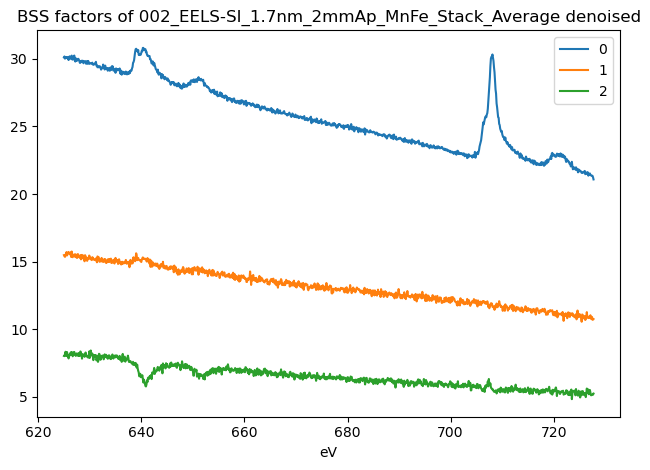

In [21]:
s.plot_bss_factors()

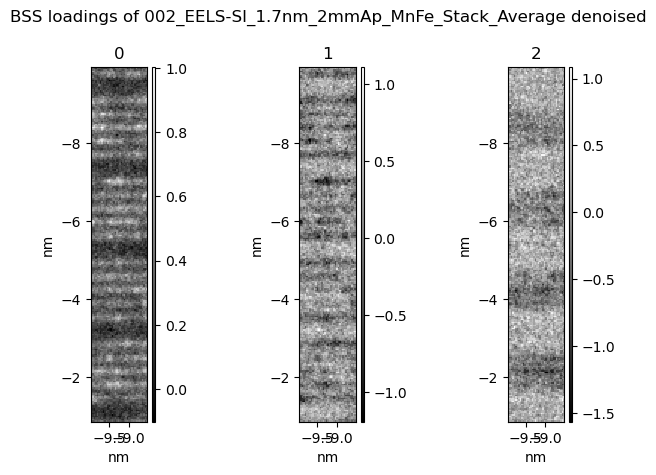

In [22]:
s.plot_bss_loadings()

In [20]:
s_denoised.add_elements(('Fe','Mn'))

In [22]:
m = s_denoised.create_model()

In [23]:
m.plot()

In [29]:
m.fit()

 message: Both actual and predicted relative reductions in the sum of squares
            are at most 0.000000
 success: True
  status: 1
     fun: [ 1.943e-01  1.706e-01 ...  3.805e-01  4.878e-01]
       x: [ 1.308e+08  2.159e+00  1.196e-02  6.018e-02]
   covar: [[ 1.818e+16  2.158e+07  3.209e+06  3.583e+06]
           [ 2.158e+07  2.561e-02  3.825e-03  4.251e-03]
           [ 3.209e+06  3.825e-03  8.493e-04  5.176e-04]
           [ 3.583e+06  4.251e-03  5.176e-04  1.361e-03]]
    nfev: 6

In [30]:
m.enable_fine_structure()

In [31]:
m.fit()

 message: Both actual and predicted relative reductions in the sum of squares
            are at most 0.000000
 success: True
  status: 1
     fun: [ 2.149e-02 -1.869e-03 ... -1.048e-03  3.725e-06]
       x: [ 4.600e+07  1.999e+00 ...  0.000e+00  5.565e-02]
   covar: None
    nfev: 32853

In [32]:
m.enable_adjust_position()

In [33]:
m.fit()

 message: Number of calls to function has reached maxfev = 38600.
 success: False
  status: 5
     fun: [-1.746e-02 -4.097e-02 ... -1.110e-03 -2.184e-06]
       x: [ 7.991e+07  2.085e+00 ...  0.000e+00  1.617e-03]
   covar: None
    nfev: 38661